### Plot Gempa Harian dari csv

      Category  Letusan/Erupsi  Hembusan  Tremor Non-Harmonik  \
730 2024-01-01               0        57                    0   
731 2024-01-02               0        44                    0   
732 2024-01-03               0        30                    0   
733 2024-01-04               0        37                    0   
734 2024-01-05               0        32                    0   

     Vulkanik Dangkal  Vulkanik Dalam  Tektonik Lokal  Terasa  Tektonik Jauh  \
730                 0               0               0       0              3   
731                 0               0               1       0              3   
732                 0               0               1       0              2   
733                 0               0               0       0              3   
734                 0               0               0       0              1   

     Tremor Menerus  
730             1.0  
731             1.0  
732             1.0  
733             1.0  
734             1.

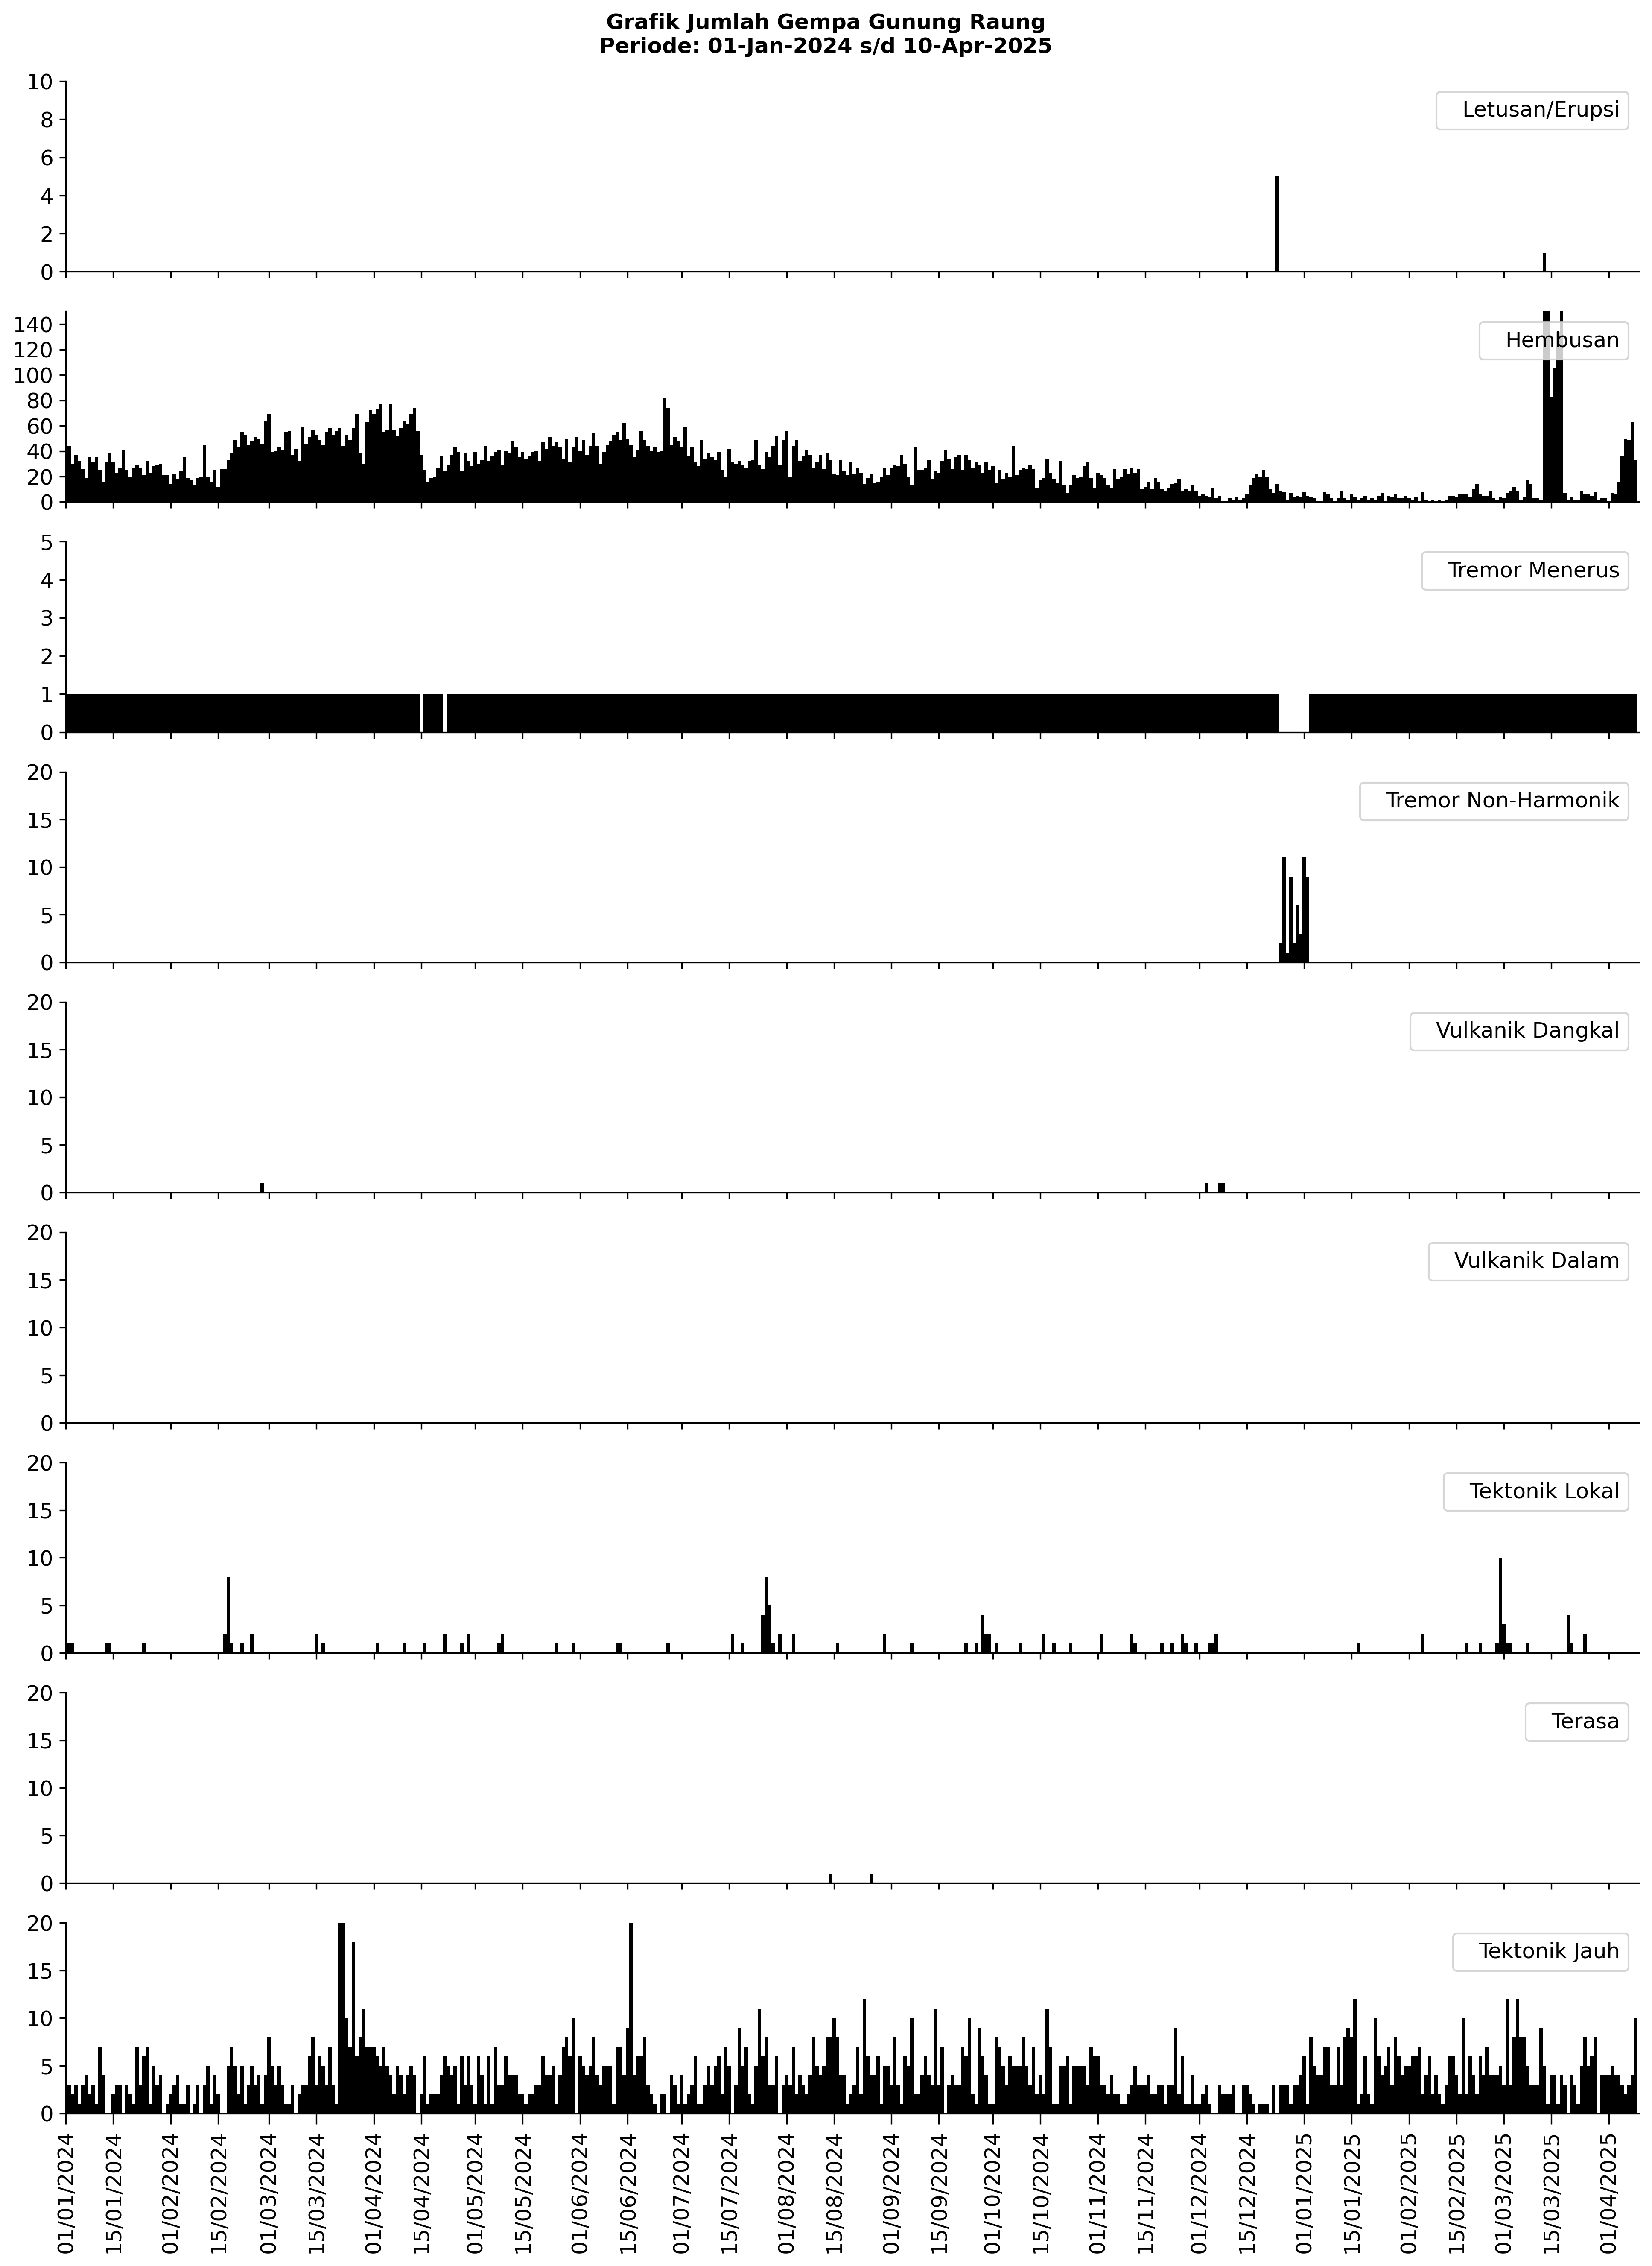

Data Terakhir : 10-Apr-2025


Timestamp('2025-04-10 00:00:00')

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

# Membaca file CSV dengan format tanggal yang jelas
# Membaca file CSV dan parsing kolom 'Category' sebagai tanggal
path_file = 'C:/Users/raung2/Downloads/grafik-kegempaan-raung.csv'

# Tentukan nama gunung, tanggal awal dan akhir dalam format dd-mm-yyyy
gunung = 'Raung'
tanggal_awal = '01-01-2024'
tanggal_akhir = '10-04-2025'

# Periksa data, apakah delimiter menggunakan koma atau titik koma
data = pd.read_csv(path_file, delimiter=',')

# Konversi string tanggal ke datetime
data['Category'] = pd.to_datetime(data['Category'], format='%Y-%m-%d')

# Mengonversi string tanggal_awal dan tanggal_akhir menjadi objek datetime
tanggal_awal = pd.to_datetime(tanggal_awal, format='%d-%m-%Y')
tanggal_akhir = pd.to_datetime(tanggal_akhir, format='%d-%m-%Y')

# Filter data berdasarkan rentang tanggal
data_filtered = data[(data['Category'] >= tanggal_awal) & (data['Category'] <= tanggal_akhir)]
print(data_filtered.head())

# Urutan grafik, nilai axis y, dan warna grafik untuk setiap jenis gempa
jenis_params = {
    'Letusan/Erupsi': {'limits': (0, 10), 'interval': 2, 'color': 'black'},
    'Hembusan': {'limits': (0, 150), 'interval': 20, 'color': 'black'},
    'Tremor Menerus': {'limits': (0, 5), 'interval': 1, 'color': 'black'},
    'Tremor Non-Harmonik': {'limits': (0, 20), 'interval': 5, 'color': 'black'},
    'Vulkanik Dangkal': {'limits': (0, 20), 'interval': 5, 'color': 'black'},
    'Vulkanik Dalam': {'limits': (0, 20), 'interval': 5, 'color': 'black'},
    'Tektonik Lokal': {'limits': (0, 20), 'interval': 5, 'color': 'black'},
    'Terasa': {'limits': (0, 20), 'interval': 5, 'color': 'black'},
    'Tektonik Jauh': {'limits': (0, 20), 'interval': 5, 'color': 'black'}
}

# Filter data berdasarkan urutan jenis gempa dan buat grafik untuk setiap jenis
fig, axes = plt.subplots(nrows=len(jenis_params), ncols=1, figsize=(13, 2*len(jenis_params)), dpi=300)

for i, (jenis, params) in enumerate(jenis_params.items()):    
    
    y_min, y_max = params['limits']
    interval = params['interval']
    warna = params['color']
    date_format = mdates.DateFormatter('%d/%m/%Y')
    
    axes[i].bar(data_filtered['Category'], data_filtered[jenis], label=jenis, color=warna, width=1.0)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlim(tanggal_awal, tanggal_akhir)
    axes[i].xaxis.set_major_formatter(date_format)
    axes[i].xaxis.set_major_locator(mdates.MonthLocator(bymonthday=[1, 15]))
    axes[i].set_ylim(y_min, y_max)
    axes[i].yaxis.set_major_locator(MultipleLocator(interval))
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)   

    # Menampilkan axis tanggal pada baris paling bawah
    if i != len(jenis_params) - 1:
        axes[i].set_xticklabels([])
    else:
        axes[i].tick_params(axis='x', which='both', length=6)

    # Legenda
    axes[i].legend(
        loc='upper right', 
        frameon=True,
        fontsize=12,
        handlelength=0
    )  
    
judul_grafik = f'Grafik Jumlah Gempa Gunung {gunung}'
periode = f'Periode: {tanggal_awal.strftime("%d-%b-%Y")} s/d {tanggal_akhir.strftime("%d-%b-%Y")}'
plt.suptitle(f"{judul_grafik}\n{periode}\n", fontsize=12, fontweight='bold', ha='center')

# Menampilkan grafik
plt.tight_layout()
plt.show()

last_row = data_filtered.iloc[-1]
timestamp_terakhir = last_row['Category']
data_terakhir = timestamp_terakhir.strftime('%d-%b-%Y')
print("Data Terakhir :", data_terakhir)

# Mukijo - PVMBG - 2025
# WA 0856-4334-6785